### Load libraries

In [85]:
library(tidyverse)
library(stringr)
library(microViz)
library(metagMisc)
library(phylosignal)
library(ggplot2)
library(ggsci)
library(viridis)
library(conflicted)
library(gridExtra)
library(vegan)
library(ape)
library(lattice)
library(permute)
library(grid) 
library(knitr)
library(phyloseq)

In [87]:
library(cowplot)
library(ggpubr)

```{r, echo=FALSE, results='hide'}
opts_chunk$set(cache=FALSE,warning=FALSE)
```

### Setup for plot labels

### Setup labels

In [4]:
#Setup for label sizes in plots
labels.x=theme(axis.title.x = element_text(size=18),
               axis.text.x = element_text(size=18,vjust=1,hjust=1,angle=45))

labels.x.pca=theme(axis.title.x = element_text(size=18),
               axis.text.x = element_text(size=18)) 

labels.y=theme(axis.title.y = element_text(size=18),
               axis.text.y= element_text(size=18))

labels.legend=theme(legend.text = element_text (size=18),
                    legend.title = element_text(size=18))

### Declare conflict preferences

In [88]:
conflict_prefer("filter","dplyr")
conflict_prefer("rename","dplyr")
conflict_prefer("mutate","dplyr")
conflict_prefer("count","dplyr")

[conflicted] Removing existing preference.
[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Removing existing preference.
[conflicted] Will prefer dplyr::rename over any other package.
[conflicted] Removing existing preference.
[conflicted] Will prefer dplyr::mutate over any other package.
[conflicted] Removing existing preference.
[conflicted] Will prefer dplyr::count over any other package.


### Source functions

In [110]:
#Import functions for plots
source("../FlagellinDiversity/plots_functions.r")

## Phyloseq analyses

In [90]:
nonrare.psAll.filt = readRDS("filter_taxa_All_count_subsampled.median.rds")

In [91]:
nonrare.psAll.filt

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1971 taxa and 352 samples ]
sample_data() Sample Data:       [ 352 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 1971 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1971 tips and 1970 internal nodes ]

In [92]:
subset.host=subset_samples(nonrare.psAll.filt,biome_1=="Host-associated")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [93]:
subset.host

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1971 taxa and 253 samples ]
sample_data() Sample Data:       [ 253 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 1971 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1971 tips and 1970 internal nodes ]

In [94]:
count(filter(as_tibble(subset.host@sam_data),category=="Plants"),family)

family,n
<chr>,<int>
Asparagaceae,1
Asteraceae,2
Brassicaceae,24
Paniceae,6
Poaceae,3
Salviniaceae,37
NA,2


### Richness plots

In [95]:
values.plot=c("#e64b35b2","#4dbbd5b2","#00a087b2","#3c5488b2","#f39b7fb2","#8491b4b2")#,"#91d1c2b2","#dc0000b2","#7e6148b2")
breaks.plot=c("Actinopterygii","Amphibia","Aves","Mammalia","Plants","Reptilia")

In [96]:
richness.estimates.host=mutate(as_tibble(subset.host@sam_data),estimate_richness(subset.host, split = TRUE, measures = c("Observed","Chao1","Shannon","Simpson")))

In [97]:
head(richness.estimates.host)

Sample,Dataset,biome_0,biome_1,biome_2,biome_3,biome_4,family,category,mammals,Observed,Chao1,se.chao1,Shannon,Simpson
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ERS1353920,MGYS00001254,root,Host-associated,Mammalia,Digestive system,Large intestine,Cricetidae,Animal,Mammalia,380,551.19565,41.620868,4.0354730,0.9418021
ERS1353922,MGYS00001254,root,Host-associated,Mammalia,Digestive system,Large intestine,Cricetidae,Animal,Mammalia,378,566.88679,43.144845,4.5500979,0.9586902
ERS1579925,MGYS00001583,root,Host-associated,Actinopterygii,Digestive system,Foregut,Salmonidae,Animal,Others,5,6.50000,2.530582,0.7892774,0.3611111
ERS1579927,MGYS00001583,root,Host-associated,Actinopterygii,Digestive system,Foregut,Salmonidae,Animal,Others,13,22.33333,8.820821,2.1348490,0.8200000
ERS1579929,MGYS00001583,root,Host-associated,Actinopterygii,Digestive system,Foregut,Salmonidae,Animal,Others,10,11.50000,2.560146,2.0888070,0.8554688
ERS1579930,MGYS00001583,root,Host-associated,Actinopterygii,Digestive system,Foregut,Salmonidae,Animal,Others,30,47.00000,10.649939,1.5786297,0.5014982


In [ ]:
ggpubr::stat_compare_means

Warning message:
“Computation failed in `stat_signif()`
Caused by error in `wilcox.test.default()`:
! not enough 'y' observations”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `wilcox.test.default()`:
! not enough 'y' observations”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `wilcox.test.default()`:
! not enough 'y' observations”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `wilcox.test.default()`:
! not enough 'y' observations”


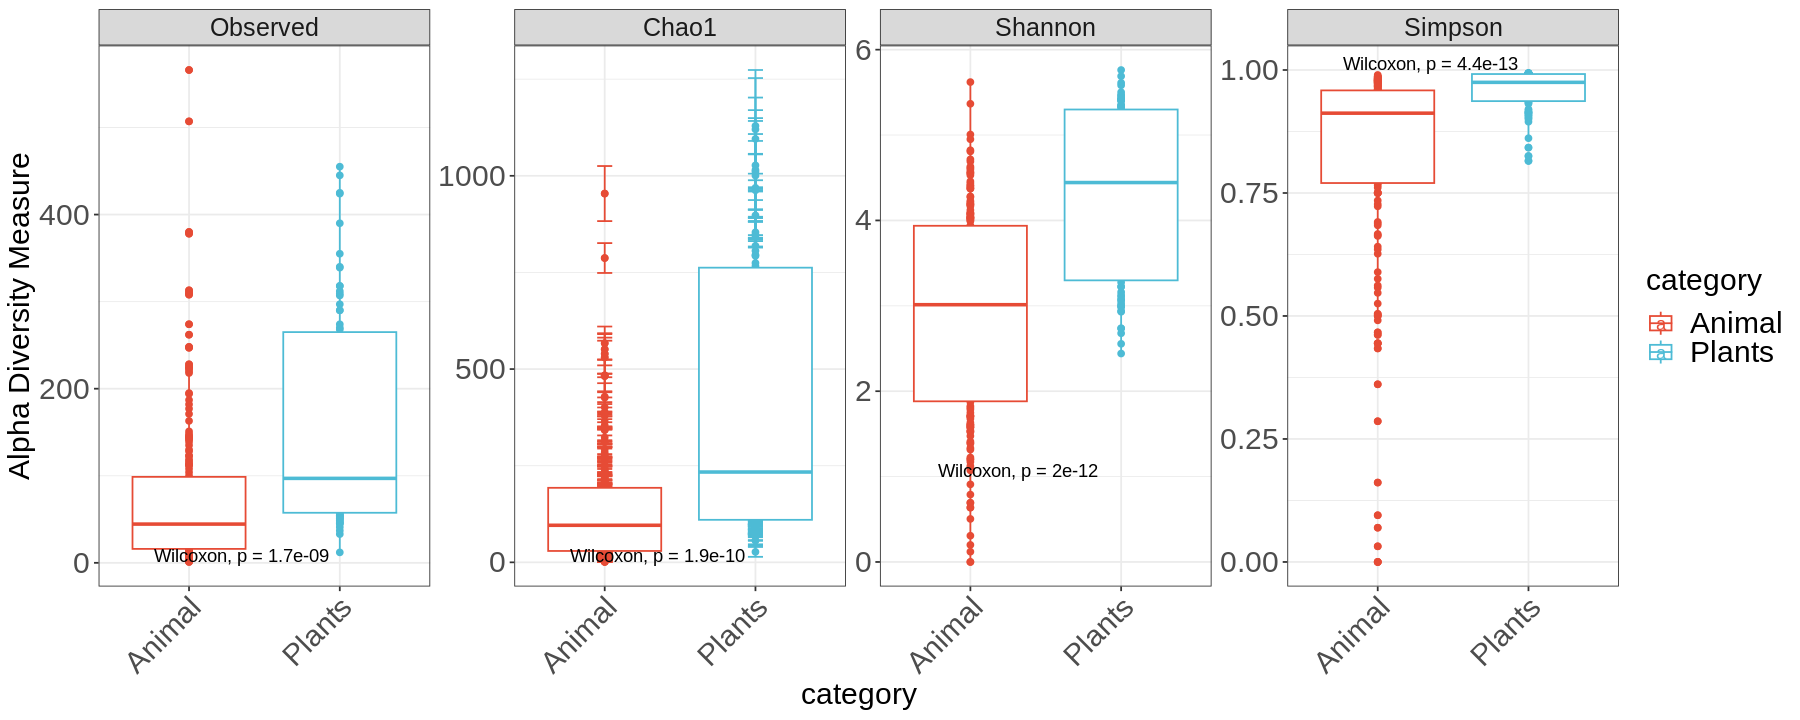

In [80]:
options(repr.plot.width=15,repr.plot.height=6)
my_comparisons = c("Animal","Plants")

plot_richness(subset.host,x="category",measures=c("Observed","Chao1","Shannon","Simpson"),color="category")+
    geom_boxplot()+
    theme_bw()+
    scale_color_npg()+
    labels.x+labels.y+labels.legend+
    theme(strip.text=element_text(size=15))+
    stat_compare_means(comparisons = my_comparisons)+
    stat_compare_means(label.y=1)


### Statistics on richness estimates

#### I. Kruskal tests by category

In [16]:
dplyr::count(richness.estimates.host,category)

category,n
<chr>,<int>
Animal,178
Plants,75


In [17]:
kruskal.test(Observed~category,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Observed by category
Kruskal-Wallis chi-squared = 36.355, df = 1, p-value = 1.644e-09


In [18]:
kruskal.test(Chao1~category,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Chao1 by category
Kruskal-Wallis chi-squared = 40.574, df = 1, p-value = 1.893e-10


In [19]:
kruskal.test(Shannon~category,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Shannon by category
Kruskal-Wallis chi-squared = 49.527, df = 1, p-value = 1.957e-12


In [20]:
kruskal.test(Simpson~category,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Simpson by category
Kruskal-Wallis chi-squared = 52.455, df = 1, p-value = 4.402e-13


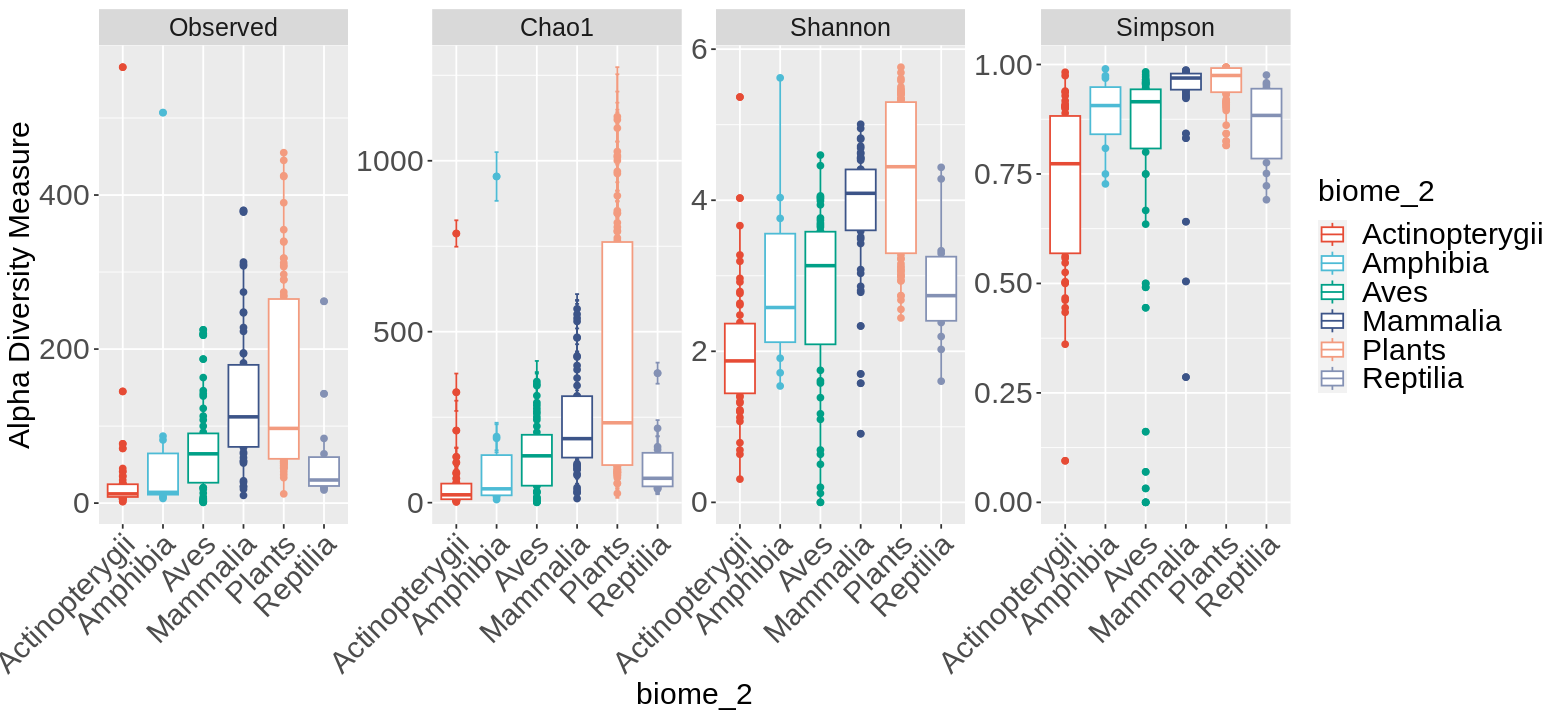

In [21]:
options(repr.plot.width=13,repr.plot.height=6)
plot_richness(subset.host,x="biome_2",measures=c("Observed","Chao1","Shannon","Simpson"),color="biome_2")+
geom_boxplot()+
scale_color_npg()+#scale_color_manual(values=values.plot,breaks=breaks.plot)+
labels.x+labels.y+labels.legend+
theme(strip.text=element_text(size=15))

#### II. Kruskal test by biome_2

In [22]:
dplyr::count(richness.estimates.host,biome_2)

biome_2,n
<chr>,<int>
Actinopterygii,51
Amphibia,11
Aves,51
Mammalia,51
Plants,75
Reptilia,14


In [23]:
kruskal.test(Observed~biome_2,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Observed by biome_2
Kruskal-Wallis chi-squared = 101.1, df = 5, p-value < 2.2e-16


In [24]:
kruskal.test(Chao1~biome_2,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Chao1 by biome_2
Kruskal-Wallis chi-squared = 93.759, df = 5, p-value < 2.2e-16


In [25]:
kruskal.test(Shannon~biome_2,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Shannon by biome_2
Kruskal-Wallis chi-squared = 109.62, df = 5, p-value < 2.2e-16


In [26]:
kruskal.test(Simpson~biome_2,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Simpson by biome_2
Kruskal-Wallis chi-squared = 109.16, df = 5, p-value < 2.2e-16


#### II. Wilcoxon test by biome_2

In [27]:
pairwise.wilcox.test(richness.estimates.host$Observed, 
                     richness.estimates.host$biome_2, 
                     p.adjust.method="fdr")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates.host$Observed and richness.estimates.host$biome_2 

         Actinopterygii Amphibia Aves    Mammalia Plants 
Amphibia 0.21946        -        -       -        -      
Aves     3.7e-05        0.25029  -       -        -      
Mammalia 7.0e-13        0.00109  0.00012 -        -      
Plants   4.6e-16        0.00122  8.7e-05 0.82495  -      
Reptilia 0.00072        0.27557  0.30525 0.00109  0.00021

P value adjustment method: fdr 

In [28]:
pairwise.wilcox.test(richness.estimates.host$Chao1, 
                     richness.estimates.host$biome_2, 
                     p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates.host$Chao1 and richness.estimates.host$biome_2 

         Actinopterygii Amphibia Aves    Mammalia Plants 
Amphibia 0.12998        -        -       -        -      
Aves     3.3e-05        0.27135  -       -        -      
Mammalia 1.5e-11        0.00607  0.00105 -        -      
Plants   2.6e-15        0.00159  0.00011 0.16509  -      
Reptilia 0.00088        0.25668  0.42492 0.00286  0.00077

P value adjustment method: fdr 

In [29]:
pairwise.wilcox.test(richness.estimates.host$Shannon, 
                     richness.estimates.host$biome_2, 
                     p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates.host$Shannon and richness.estimates.host$biome_2 

         Actinopterygii Amphibia Aves    Mammalia Plants 
Amphibia 0.01057        -        -       -        -      
Aves     0.00041        0.92659  -       -        -      
Mammalia 3.5e-12        0.00682  2.1e-07 -        -      
Plants   < 2e-16        0.00450  2.1e-07 0.16993  -      
Reptilia 0.00116        0.92659  0.59780 0.00099  5.1e-05

P value adjustment method: fdr 

In [30]:
pairwise.wilcox.test(richness.estimates.host$Simpson, 
                     richness.estimates.host$biome_2, 
                     p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates.host$Simpson and richness.estimates.host$biome_2 

         Actinopterygii Amphibia Aves    Mammalia Plants 
Amphibia 0.00757        -        -       -        -      
Aves     0.00106        0.69821  -       -        -      
Mammalia 1.1e-11        0.01499  1.2e-07 -        -      
Plants   4.0e-16        0.00392  1.0e-08 0.09813  -      
Reptilia 0.01300        0.65991  0.95546 0.00075  0.00027

P value adjustment method: fdr 

### Beta diversity

### 1. Ordination

In [31]:
#Distance matrices for anosim
jaccard.dist = distance(subset.host,method="jaccard",type="samples")
unifrac.dist = distance(subset.host,method="unifrac",type="samples")
bray.dist = distance(subset.host,method="bray",type="samples")
wunifrac.dist = distance(subset.host,method="wunifrac",type="samples")

In [32]:
jaccard.host = ordinate(subset.host,distance="jaccard",method="PCoA")
unifrac.host = ordinate(subset.host,distance="unifrac",method="PCoA")
bray.host = ordinate(subset.host,distance="bray",method="PCoA")
wunifrac.host = ordinate(subset.host,distance="wunifrac",method="PCoA")

### 2. Plots

#### By category

In [99]:
colors.map = read_tsv("../FlagellinDiversity/Figures/colors.map.tsv")

Rows: 11 Columns: 2
── Column specification ─────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): biome, color

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [112]:
colors.map.cat = colors.map[3:4,] %>%
    rename(category="biome")

In [115]:
jacc.plot.cat = plot_color_discrete(subset.host,jaccard.host,"category")+
theme_minimal()+
    geom_point(size = 3,alpha=0.3)+
    ggtitle("Jaccard")+
    scale_colour_manual(values=colors.map.cat$color,
                 limits = colors.map.cat$category)+
theme(strip.text=element_text(size=15),
     axis.text = element_text(size=15),
     axis.title = element_text(size=15),
     legend.position="none",
     plot.title = element_text(size = 15, face = "bold"),
     plot.tag = element_text(size=15,face="bold"))+
#     labs(tag = "Jaccard")+#+# Customize titles)+

    stat_ellipse(
      level = 0.95,  # Set the confidence level
      type = "t",  # Specify ellipse type
      geom = "polygon",  # Use polygons for ellipses
      linetype = 2,  # Set line type for ellipses
     lwd=0.5,
        alpha = 0  # Set transparency for ellipses
    )+
xlab("PCo1 [5.4%]")+
ylab("PCo2 [4.4%]")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [116]:
bray.plot.cat = plot_color_discrete(subset.host,bray.host,"category")+
theme_minimal()+
    geom_point(size = 3,alpha=0.3)+
    ggtitle("Bray-Curtis")+
    scale_colour_manual(values=colors.map.cat$color,
                 limits = colors.map.cat$category)+
theme(strip.text=element_text(size=15),
     axis.text = element_text(size=15),
     axis.title = element_text(size=15),
     legend.position="none",
     plot.title = element_text(size = 15, face = "bold"),
     plot.tag = element_text(size=15,face="bold"))+
#     labs(tag = "Jaccard")+#+# Customize titles)+

    stat_ellipse(
      level = 0.95,  # Set the confidence level
      type = "t",  # Specify ellipse type
      geom = "polygon",  # Use polygons for ellipses
      linetype = 2,  # Set line type for ellipses
     lwd=0.5,
        alpha = 0  # Set transparency for ellipses
    )+
xlab("PCo1 [8.6%]")+
ylab("PCo2 [6.9%]")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [117]:
unifrac.plot.cat = plot_color_discrete(subset.host,unifrac.host,"category")+
theme_minimal()+
    geom_point(size = 3,alpha=0.3)+
    ggtitle("Unweighted UniFrac")+
    scale_colour_manual(values=colors.map.cat$color,
                 limits = colors.map.cat$category)+
theme(strip.text=element_text(size=15),
     axis.text = element_text(size=15),
     axis.title = element_text(size=15),
     legend.position="none",
     plot.title = element_text(size = 15, face = "bold"),
     plot.tag = element_text(size=15,face="bold"))+
#     labs(tag = "Jaccard")+#+# Customize titles)+

    stat_ellipse(
      level = 0.95,  # Set the confidence level
      type = "t",  # Specify ellipse type
      geom = "polygon",  # Use polygons for ellipses
      linetype = 2,  # Set line type for ellipses
     lwd=0.5,
        alpha = 0  # Set transparency for ellipses
    )+
xlab("PCo1 [11.3%]")+
ylab("PCo2 [4.8%]")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [151]:
wunifrac.plot.cat = plot_color_discrete(subset.host,wunifrac.host,"category")+
theme_minimal()+
    geom_point(size = 3,alpha=0.3)+
    ggtitle("Weighted UniFrac")+
    scale_colour_manual(values=colors.map.cat$color,
                 limits = colors.map.cat$category)+
theme(strip.text=element_text(size=15),
     axis.text = element_text(size=15),
     axis.title = element_text(size=15),
     legend.position="top",
     plot.title = element_text(size = 15, face = "bold"),
     plot.tag = element_text(size=15,face="bold"))+
#     labs(tag = "Jaccard")+#+# Customize titles)+

    stat_ellipse(
      level = 0.95,  # Set the confidence level
      type = "t",  # Specify ellipse type
      geom = "polygon",  # Use polygons for ellipses
      linetype = 2,  # Set line type for ellipses
     lwd=0.5,
        alpha = 0  # Set transparency for ellipses
    )+
xlab("PCo1 [23.7%]")+
ylab("PCo2 [14.6%]")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [33]:
jaccard.plot = plot_color_discrete(subset.host,jaccard.host,"category")
bray.plot = plot_color_discrete(subset.host,bray.host,"category")
unifrac.plot = plot_color_discrete(subset.host,unifrac.host,"category")
wunifrac.plot = plot_color_discrete(subset.host,wunifrac.host,"category")


In [184]:
#options(repr.plot.width=12,repr.plot.height=12)
pdf("../FlagellinDiversity/Figures/Figure6A.pdf",pointsize = 10,height=12,width=12)
grid.arrange(plot_grid_pcoa(jaccard.host,jacc.plot.cat,"category",richness.estimates.host,colors.map.cat),
            plot_grid_pcoa(unifrac.host,unifrac.plot.cat,"category",richness.estimates.host,colors.map.cat),
            plot_grid_pcoa(bray.host,bray.plot.cat,"category",richness.estimates.host,colors.map.cat),
            plot_grid_pcoa(wunifrac.host,wunifrac.plot.cat,"category",richness.estimates.host,colors.map.cat),
            nrow=2)
dev.off()

Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`


png 
  2

Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`


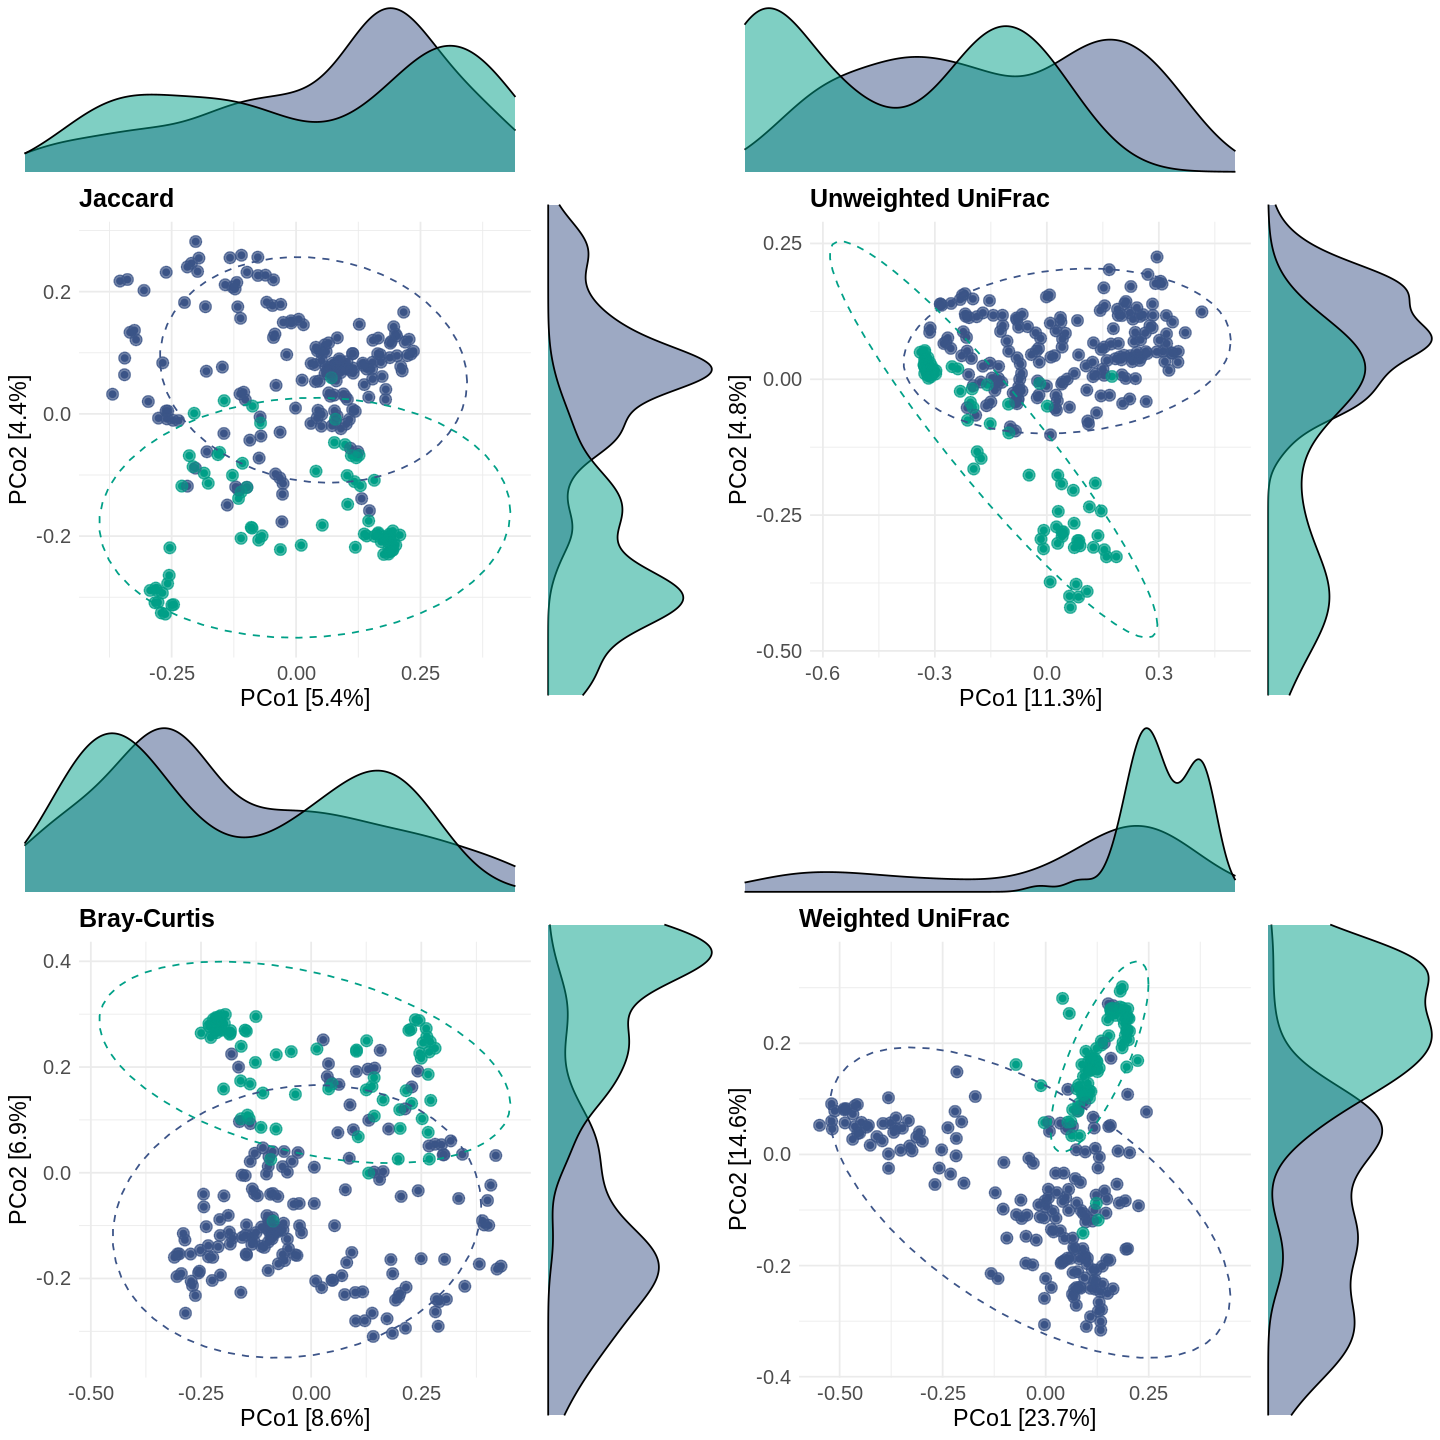

In [124]:
grid.arrange(plot_grid_pcoa(jaccard.host,jacc.plot.cat,"category",richness.estimates.host,colors.map.cat),
            plot_grid_pcoa(unifrac.host,unifrac.plot.cat,"category",richness.estimates.host,colors.map.cat),
            plot_grid_pcoa(bray.host,bray.plot.cat,"category",richness.estimates.host,colors.map.cat),
            plot_grid_pcoa(wunifrac.host,wunifrac.plot.cat,"category",richness.estimates.host,colors.map.cat),
            nrow=2)

##### ANOSIM

In [98]:
cat.var = get_variable(subset.host,"category")

In [36]:
cat.anosim.jacc = anosim(jaccard.dist,cat.var)
cat.anosim.unifrac = anosim(unifrac.dist,cat.var)
cat.anosim.bray = anosim(bray.dist,cat.var)
cat.anosim.wunifrac = anosim(wunifrac.dist,cat.var)

In [37]:
anosim.results.cat = data.frame(
    col = c("significance","R_statistic"),
    "jaccard" = c(cat.anosim.jacc$signif,cat.anosim.jacc$statistic),
    "bray" = c(cat.anosim.bray$signif,cat.anosim.bray$statistic),
    "unifrac" = c(cat.anosim.unifrac$signif,cat.anosim.unifrac$statistic),
    "wunifrac" = c(cat.anosim.wunifrac$signif,cat.anosim.wunifrac$statistic))

In [38]:
anosim.results.cat

col,jaccard,bray,unifrac,wunifrac
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
significance,0.547000000,0.528000000,0.0010000,0.02500000
R_statistic,-0.003770772,-0.003770772,0.1397663,0.06480031


##### PERMANOVA

In [82]:
methods_to_test <- c("jaccard", "bray", "unifrac", "wunifrac")
all_permanova_biome2 <- run_permanova(subset.host, methods_to_test, "category")

In [83]:
all_permanova_biome2

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
category,1,3.788727,0.03258941,8.455503,0.001
Residual,251,112.467642,0.96741059,NA,NA
Total,252,116.256369,1.00000000,NA,NA
,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
category,1,5.310558,0.04871068,12.85243,0.001
Residual,251,103.711896,0.95128932,NA,NA
Total,252,109.022454,1.00000000,NA,NA
,Df,SumOfSqs,R2,F,Pr(>F)


##### Wilcoxon on PCoA axis

In [39]:
#Get ordination vectors
ord.vectors = list(jaccard.vector = getOrdinationVectors(jaccard.host,richness.estimates.host),
    bray.vector = getOrdinationVectors(bray.host,richness.estimates.host),
    unifrac.vector = getOrdinationVectors(unifrac.host,richness.estimates.host), 
    wunifrac.vector = getOrdinationVectors(wunifrac.host,richness.estimates.host))

Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`


In [40]:
ord.wilcoxon.list.cat = lapply(ord.vectors,wilcoxonOrdinationAxis,"category")

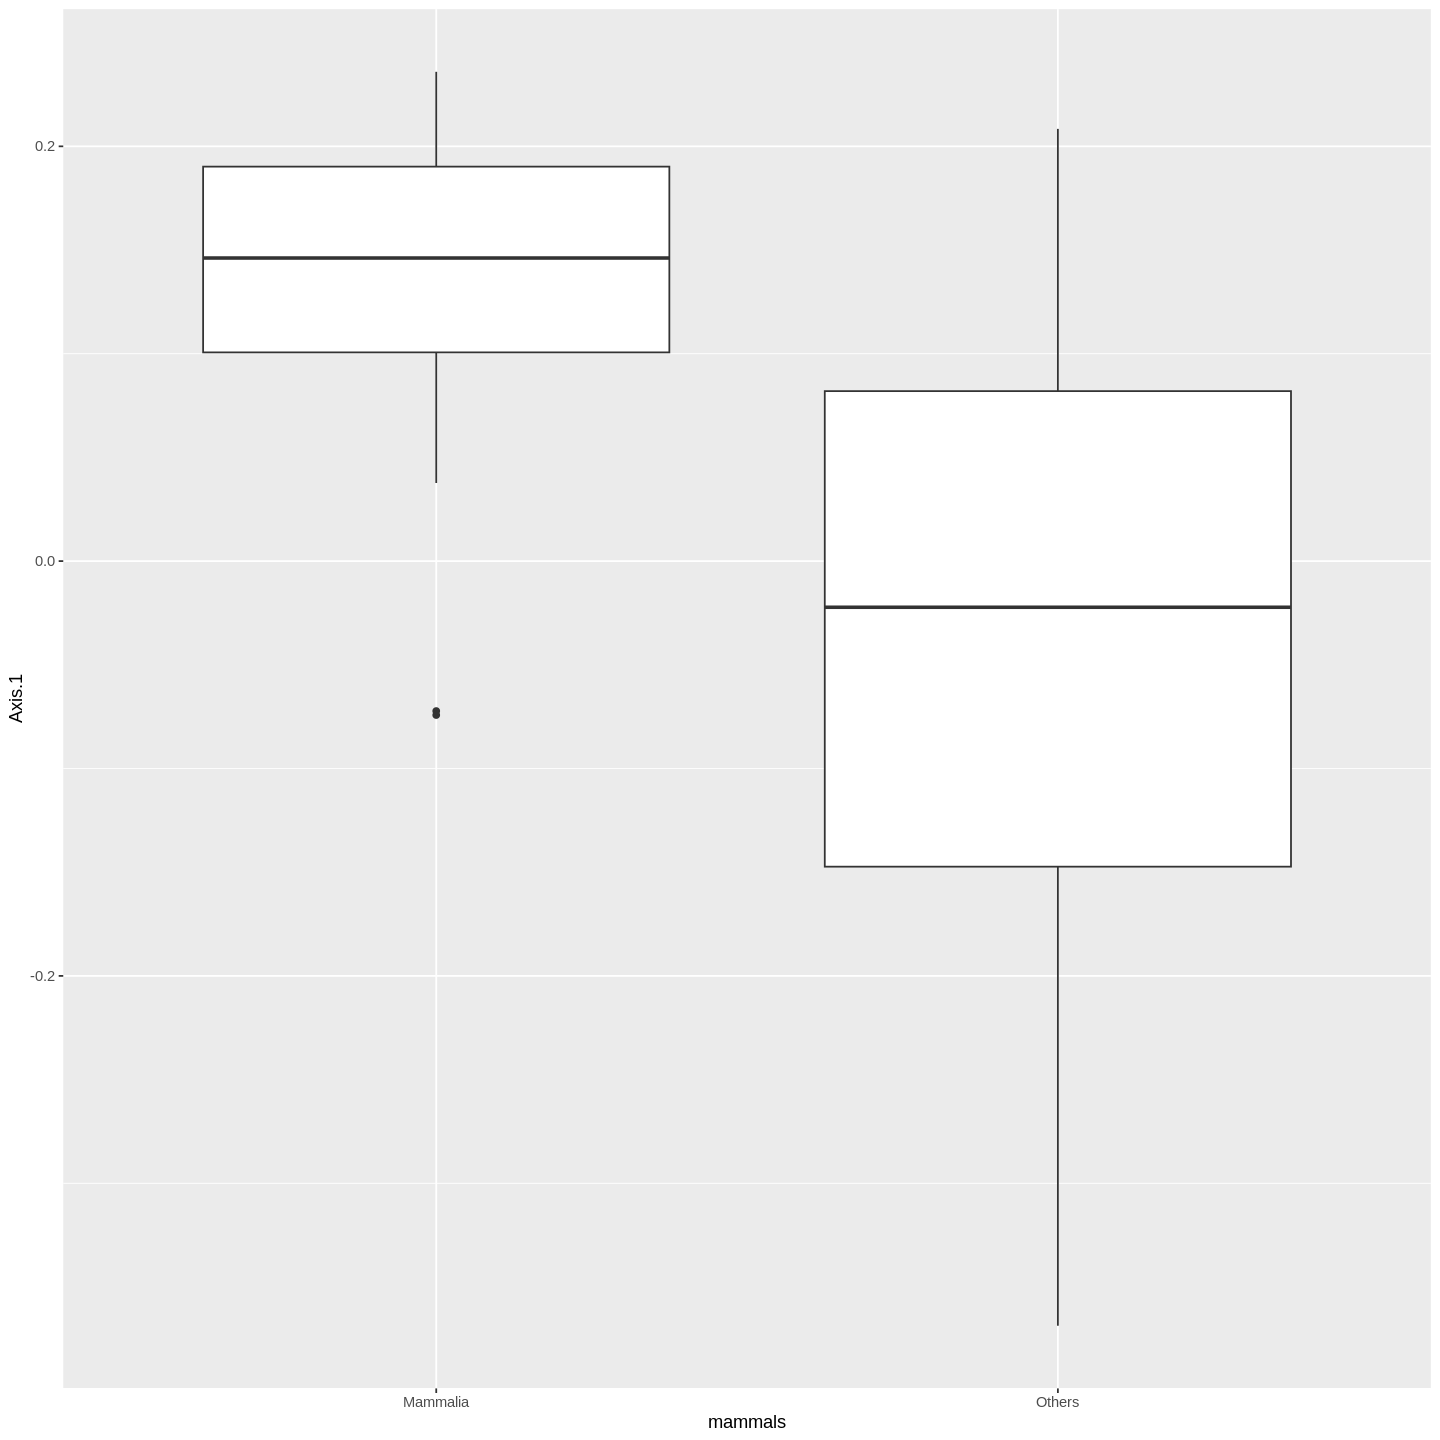

In [198]:
ggplot(data=ord.vectors$jaccard.vector,aes(x=mammals,y=Axis.1))+geom_boxplot()

In [41]:
wilcoxon.axis.stats.cat <- rbind(
  ord.wilcoxon.list.cat[[1]] %>% mutate(OrdMethod = "Jaccard"),
  ord.wilcoxon.list.cat[[2]] %>% mutate(OrdMethod = "Bray"),
  ord.wilcoxon.list.cat[[3]] %>% mutate(OrdMethod = "Unifrac"),
  ord.wilcoxon.list.cat[[4]] %>% mutate(OrdMethod = "wUnifrac")
)

In [42]:
wilcoxon.axis.stats.cat

,Animal,Animal.1,Animal.2,Animal.3,OrdMethod
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Plants,7.441317e-01,3.517494e-31,4.877552e-02,2.530630e-08,Jaccard
Plants1,7.526860e-01,4.135130e-30,3.406794e-01,7.179551e-05,Bray
Plants2,1.217981e-08,1.991616e-19,5.705696e-11,5.027917e-04,Unifrac
Plants3,1.664151e-13,1.254809e-28,6.268213e-02,4.333239e-01,wUnifrac


#### By biome_2

In [129]:
cols.biome2=colors.map[3:9,] %>%
    rename(category="biome")

In [135]:
jacc.plot.2 = plot_color_discrete(subset.host,jaccard.host,"biome_2")+
theme_minimal()+
    geom_point(size = 3,alpha=0.3)+
    ggtitle("Jaccard")+
    scale_colour_manual(values=cols.biome2$color,
                 limits = cols.biome2$category)+
theme(strip.text=element_text(size=15),
     axis.text = element_text(size=15),
     axis.title = element_text(size=15),
     legend.position="none",
     plot.title = element_text(size = 15, face = "bold"),
     plot.tag = element_text(size=15,face="bold"))+
#     labs(tag = "Jaccard")+#+# Customize titles)+

    stat_ellipse(
      level = 0.95,  # Set the confidence level
      type = "t",  # Specify ellipse type
      geom = "polygon",  # Use polygons for ellipses
      linetype = 2,  # Set line type for ellipses
     lwd=0.5,
        alpha = 0  # Set transparency for ellipses
    )+
xlab("PCo1 [5.4%]")+
ylab("PCo2 [4.4%]")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [136]:
bray.plot.2 = plot_color_discrete(subset.host,bray.host,"biome_2")+
theme_minimal()+
    geom_point(size = 3,alpha=0.3)+
    ggtitle("Bray-Curtis")+
    scale_colour_manual(values=cols.biome2$color,
                 limits = cols.biome2$category)+
theme(strip.text=element_text(size=15),
     axis.text = element_text(size=15),
     axis.title = element_text(size=15),
     legend.position="none",
     plot.title = element_text(size = 15, face = "bold"),
     plot.tag = element_text(size=15,face="bold"))+
#     labs(tag = "Jaccard")+#+# Customize titles)+

    stat_ellipse(
      level = 0.95,  # Set the confidence level
      type = "t",  # Specify ellipse type
      geom = "polygon",  # Use polygons for ellipses
      linetype = 2,  # Set line type for ellipses
     lwd=0.5,
        alpha = 0  # Set transparency for ellipses
    )+
xlab("PCo1 [8.6%]")+
ylab("PCo2 [6.9%]")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [137]:
unifrac.plot.2 = plot_color_discrete(subset.host,unifrac.host,"biome_2")+
theme_minimal()+
    geom_point(size = 3,alpha=0.3)+
    ggtitle("Unweighted UniFrac")+
    scale_colour_manual(values=cols.biome2$color,
                 limits = cols.biome2$category)+
theme(strip.text=element_text(size=15),
     axis.text = element_text(size=15),
     axis.title = element_text(size=15),
     legend.position="none",
     plot.title = element_text(size = 15, face = "bold"),
     plot.tag = element_text(size=15,face="bold"))+
#     labs(tag = "Jaccard")+#+# Customize titles)+

    stat_ellipse(
      level = 0.95,  # Set the confidence level
      type = "t",  # Specify ellipse type
      geom = "polygon",  # Use polygons for ellipses
      linetype = 2,  # Set line type for ellipses
     lwd=0.5,
        alpha = 0  # Set transparency for ellipses
    )+
xlab("PCo1 [11.3%]")+
ylab("PCo2 [4.8%]")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [140]:
wunifrac.plot.2 = plot_color_discrete(subset.host,wunifrac.host,"biome_2")+
theme_minimal()+
    geom_point(size = 3,alpha=0.3)+
    ggtitle("Weighted UniFrac")+
    scale_colour_manual(values=cols.biome2$color,
                 limits = cols.biome2$category)+
theme(strip.text=element_text(size=15),
     axis.text = element_text(size=15),
     axis.title = element_text(size=15),
     legend.position="top",
     plot.title = element_text(size = 15, face = "bold"),
     plot.tag = element_text(size=15,face="bold"))+
#     labs(tag = "Jaccard")+#+# Customize titles)+

    stat_ellipse(
      level = 0.95,  # Set the confidence level
      type = "t",  # Specify ellipse type
      geom = "polygon",  # Use polygons for ellipses
      linetype = 2,  # Set line type for ellipses
     lwd=0.5,
        alpha = 0  # Set transparency for ellipses
    )+
xlab("PCo1 [23.7%]")+
ylab("PCo2 [14.6%]")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [152]:
options(repr.plot.width=5,repr.plot.height=5)
pdf("../FlagellinDiversity/Figures/Figure6A_legends.pdf")
wunifrac.plot.cat
dev.off()

png 
  2

In [43]:
jaccard.plot.biome2 = plot_color_discrete(subset.host,jaccard.host,"biome_2")
bray.plot.biome2 = plot_color_discrete(subset.host,bray.host,"biome_2")
unifrac.plot.biome2 = plot_color_discrete(subset.host,unifrac.host,"biome_2")
wunifrac.plot.biome2 = plot_color_discrete(subset.host,wunifrac.host,"biome_2")


In [185]:
#options(repr.plot.width=12,repr.plot.height=12)
pdf("../FlagellinDiversity/Figures/Figure7B.pdf",pointsize=10,width=12,height=12)
grid.arrange(plot_grid_pcoa(jaccard.host,jacc.plot.2,"biome_2",richness.estimates.host,cols.biome2),
            plot_grid_pcoa(unifrac.host,unifrac.plot.2,"biome_2",richness.estimates.host,cols.biome2),
            plot_grid_pcoa(bray.host,bray.plot.2,"biome_2",richness.estimates.host,cols.biome2),
            plot_grid_pcoa(wunifrac.host,wunifrac.plot.2,"biome_2",richness.estimates.host,cols.biome2),
            nrow=2)
dev.off()

Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`


png 
  2

##### ANOSIM

In [45]:
biome2.var = get_variable(subset.host,"biome_2")

In [46]:
biome2.anosim.jacc = anosim(jaccard.dist,biome2.var)
biome2.anosim.unifrac = anosim(unifrac.dist,biome2.var)
biome2.anosim.bray = anosim(bray.dist,biome2.var)
biome2.anosim.wunifrac = anosim(wunifrac.dist,biome2.var)

In [47]:
anosim.results.biome2 = data.frame(
    col = c("significance","R_statistic"),
    "jaccard" = c(biome2.anosim.jacc$signif,biome2.anosim.jacc$statistic),
    "bray" = c(biome2.anosim.bray$signif,biome2.anosim.bray$statistic),
    "unifrac" = c(biome2.anosim.unifrac$signif,biome2.anosim.unifrac$statistic),
    "wunifrac" = c(biome2.anosim.wunifrac$signif,biome2.anosim.wunifrac$statistic))

In [48]:
anosim.results.biome2

col,jaccard,bray,unifrac,wunifrac
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
significance,0.0010000,0.0010000,0.0010000,0.0010000
R_statistic,0.4306147,0.4306147,0.3870549,0.5014127


##### Wilcoxon on PCoA axis

In [49]:
ord.wilcoxon.list.biome2 = lapply(ord.vectors,wilcoxonOrdinationAxis,"biome_2")

In [50]:
wilcoxon.axis.stats.biome2 <- rbind(
  ord.wilcoxon.list.biome2[[1]] %>% mutate(OrdMethod = "Jaccard"),
  ord.wilcoxon.list.biome2[[2]] %>% mutate(OrdMethod = "Bray"),
  ord.wilcoxon.list.biome2[[3]] %>% mutate(OrdMethod = "Unifrac"),
  ord.wilcoxon.list.biome2[[4]] %>% mutate(OrdMethod = "wUnifrac")
)

In [51]:
wilcoxon.axis.stats.biome2

,axis1.Actinopterygii,axis1.Amphibia,axis1.Aves,axis1.Mammalia,axis1.Plants,axis2.Actinopterygii,axis2.Amphibia,axis2.Aves,axis2.Mammalia,axis2.Plants,⋯,axis3.Amphibia,axis3.Aves,axis3.Mammalia,axis3.Plants,axis4.Actinopterygii,axis4.Amphibia,axis4.Aves,axis4.Mammalia,axis4.Plants,OrdMethod
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Amphibia,2.909039e-02,NA,NA,NA,NA,1.818513e-01,NA,NA,NA,NA,⋯,NA,NA,NA,NA,8.393776e-01,NA,NA,NA,NA,Jaccard
Aves,4.415949e-05,6.385898e-01,NA,NA,NA,5.195622e-07,9.228640e-02,NA,NA,NA,⋯,6.093720e-01,NA,NA,NA,2.791710e-03,0.0097384785,NA,NA,NA,Jaccard
Mammalia,1.614006e-14,7.964978e-05,9.291825e-12,NA,NA,1.139005e-02,9.119669e-01,2.576860e-06,NA,NA,⋯,2.156017e-05,3.327889e-12,NA,NA,8.931111e-07,0.0002411692,7.784798e-05,NA,NA,Jaccard
Plants,2.511557e-04,6.385898e-01,4.538282e-01,7.964978e-05,NA,1.540942e-19,1.141836e-05,3.919760e-15,1.540942e-19,NA,⋯,9.896835e-01,6.093720e-01,2.156017e-05,NA,8.202234e-01,0.4877812942,9.207533e-08,6.044344e-17,NA,Jaccard
Reptilia,3.988785e-03,4.344443e-01,4.344443e-01,2.092369e-04,7.480902e-01,1.139005e-02,5.364306e-01,3.330066e-01,9.228640e-02,6.729096e-07,⋯,5.007866e-01,6.737132e-01,2.156017e-05,0.609372028,2.563685e-01,0.1608123570,4.279697e-01,1.409932e-02,0.051551501,Jaccard
Amphibia1,2.376297e-02,NA,NA,NA,NA,3.071241e-01,NA,NA,NA,NA,⋯,NA,NA,NA,NA,5.014873e-01,NA,NA,NA,NA,Bray
Aves1,7.370996e-06,5.283809e-01,NA,NA,NA,8.512671e-06,1.200477e-01,NA,NA,NA,⋯,1.494136e-02,NA,NA,NA,5.753217e-01,0.1929282702,NA,NA,NA,Bray
Mammalia1,7.496016e-15,4.400216e-05,5.439622e-12,NA,NA,4.267079e-01,5.719244e-01,1.360242e-07,NA,NA,⋯,2.119649e-06,5.573106e-14,NA,NA,1.754314e-04,0.0010628806,4.040171e-04,NA,NA,Bray
Plants1,4.608704e-06,5.283809e-01,4.466140e-01,4.699270e-07,NA,2.816318e-19,1.972555e-05,9.009116e-14,1.458887e-19,NA,⋯,8.005688e-01,8.682271e-01,2.290118e-03,NA,5.014873e-01,0.6266864050,8.045310e-02,5.834549e-13,NA,Bray


#### Mammals vs. non-mammals

In [52]:
#subset.host.filt.no.mammals = subset_samples(subset.host,biome_2!="Mammalia")
subset.host.filt.animals=subset_samples(subset.host,category=="Animal")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [53]:
subset.host.filt.animals

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1971 taxa and 178 samples ]
sample_data() Sample Data:       [ 178 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 1971 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1971 tips and 1970 internal nodes ]

In [54]:
jaccard.animal.filt = ordinate(subset.host.filt.animals,distance="jaccard",method="PCoA")
unifrac.animal.filt = ordinate(subset.host.filt.animals,distance="unifrac",method="PCoA")
bray.animal.filt = ordinate(subset.host.filt.animals,distance="bray",method="PCoA")
wunifrac.animal.filt = ordinate(subset.host.filt.animals,distance="wunifrac",method="PCoA")

In [169]:
cols.mammals = cols.biome2 %>%
rbind(c("Others","#F0941F"))
cols.mammals = cols.mammals[7:8,]

In [175]:
cols.mammals

category,color
<chr>,<chr>
Mammals,#7E6148FF
Others,#F0941F


In [170]:
jacc.plot.mamm = plot_color_discrete(subset.host,jaccard.host,"mammals")+
theme_minimal()+
    geom_point(size = 3,alpha=0.3)+
    ggtitle("Jaccard")+
    scale_colour_manual(values=cols.mammals$color,
                 limits = cols.mammals$category)+
theme(strip.text=element_text(size=15),
     axis.text = element_text(size=15),
     axis.title = element_text(size=15),
     legend.position="none",
     plot.title = element_text(size = 15, face = "bold"),
     plot.tag = element_text(size=15,face="bold"))+
#     labs(tag = "Jaccard")+#+# Customize titles)+

    stat_ellipse(
      level = 0.95,  # Set the confidence level
      type = "t",  # Specify ellipse type
      geom = "polygon",  # Use polygons for ellipses
      linetype = 2,  # Set line type for ellipses
     lwd=0.5,
        alpha = 0  # Set transparency for ellipses
    )+
xlab("PCo1 [6.4%]")+
ylab("PCo2 [4.3%]")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [171]:
bray.plot.mamm = plot_color_discrete(subset.host,bray.host,"mammals")+
theme_minimal()+
    geom_point(size = 3,alpha=0.3)+
    ggtitle("Bray-Curtis")+
    scale_colour_manual(values=cols.mammals$color,
                 limits = cols.mammals$category)+
theme(strip.text=element_text(size=15),
     axis.text = element_text(size=15),
     axis.title = element_text(size=15),
     legend.position="none",
     plot.title = element_text(size = 15, face = "bold"),
     plot.tag = element_text(size=15,face="bold"))+
#     labs(tag = "Jaccard")+#+# Customize titles)+

    stat_ellipse(
      level = 0.95,  # Set the confidence level
      type = "t",  # Specify ellipse type
      geom = "polygon",  # Use polygons for ellipses
      linetype = 2,  # Set line type for ellipses
     lwd=0.5,
        alpha = 0  # Set transparency for ellipses
    )+
xlab("PCo1 [10.1%]")+
ylab("PCo2 [6.3%]")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [172]:
unifrac.plot.mamm = plot_color_discrete(subset.host,unifrac.host,"mammals")+
theme_minimal()+
    geom_point(size = 3,alpha=0.3)+
    ggtitle("Unweighted UniFrac")+
    scale_colour_manual(values=cols.mammals$color,
                 limits = cols.mammals$category)+
theme(strip.text=element_text(size=15),
     axis.text = element_text(size=15),
     axis.title = element_text(size=15),
     legend.position="none",
     plot.title = element_text(size = 15, face = "bold"),
     plot.tag = element_text(size=15,face="bold"))+
#     labs(tag = "Jaccard")+#+# Customize titles)+

    stat_ellipse(
      level = 0.95,  # Set the confidence level
      type = "t",  # Specify ellipse type
      geom = "polygon",  # Use polygons for ellipses
      linetype = 2,  # Set line type for ellipses
     lwd=0.5,
        alpha = 0  # Set transparency for ellipses
    )+
xlab("PCo1 [11.6%]")+
ylab("PCo2 [4.3%]")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [173]:
wunifrac.plot.mamm = plot_color_discrete(subset.host,wunifrac.host,"mammals")+
theme_minimal()+
    geom_point(size = 3,alpha=0.3)+
    ggtitle("Weighted UniFrac")+
    scale_colour_manual(values=cols.mammals$color,
                 limits = cols.mammals$category)+
theme(strip.text=element_text(size=15),
     axis.text = element_text(size=15),
     axis.title = element_text(size=15),
     legend.position="top",
     plot.title = element_text(size = 15, face = "bold"),
     plot.tag = element_text(size=15,face="bold"))+
#     labs(tag = "Jaccard")+#+# Customize titles)+

    stat_ellipse(
      level = 0.95,  # Set the confidence level
      type = "t",  # Specify ellipse type
      geom = "polygon",  # Use polygons for ellipses
      linetype = 2,  # Set line type for ellipses
     lwd=0.5,
        alpha = 0  # Set transparency for ellipses
    )+
xlab("PCo1 [28.2%]")+
ylab("PCo2 [7.9%]")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [55]:
jaccard.plot.animals = plot_color_discrete(subset.host.filt.animals,jaccard.animal.filt,"mammals")
bray.plot.animals = plot_color_discrete(subset.host.filt.animals,bray.animal.filt,"mammals")
unifrac.plot.animals = plot_color_discrete(subset.host.filt.animals,unifrac.animal.filt,"mammals")
wunifrac.plot.animals = plot_color_discrete(subset.host.filt.animals,wunifrac.animal.filt,"mammals")

In [186]:
#options(repr.plot.width=12,repr.plot.height=12)
pdf("../FlagellinDiversity/Figures/Figure8A.pdf",pointsize=13,width=12,height=12)
grid.arrange(plot_grid_pcoa(jaccard.animal.filt,jacc.plot.mamm,"mammals",richness.estimates.host,cols.mammals),
            plot_grid_pcoa(unifrac.animal.filt,unifrac.plot.mamm,"mammals",richness.estimates.host,cols.mammals),
            plot_grid_pcoa(bray.animal.filt,bray.plot.mamm,"mammals",richness.estimates.host,cols.mammals),
            plot_grid_pcoa(wunifrac.animal.filt,wunifrac.plot.mamm,"mammals",richness.estimates.host,cols.mammals),
            nrow=2)
dev.off()

Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`


png 
  2

##### ANOSIM

In [57]:
mammals.var = get_variable(subset.host,"mammals")

In [58]:
mammals.anosim.jacc = anosim(jaccard.dist,mammals.var)
mammals.anosim.unifrac = anosim(unifrac.dist,mammals.var)
mammals.anosim.bray = anosim(bray.dist,mammals.var)
mammals.anosim.wunifrac = anosim(wunifrac.dist,mammals.var)

In [59]:
anosim.results.mammals = data.frame(
    col = c("significance","R_statistic"),
    "jaccard" = c(mammals.anosim.jacc$signif,mammals.anosim.jacc$statistic),
    "bray" = c(mammals.anosim.bray$signif,mammals.anosim.bray$statistic),
    "unifrac" = c(mammals.anosim.unifrac$signif,mammals.anosim.unifrac$statistic),
    "wunifrac" = c(mammals.anosim.wunifrac$signif,mammals.anosim.wunifrac$statistic))

In [60]:
anosim.results.mammals

col,jaccard,bray,unifrac,wunifrac
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
significance,0.0010000,0.0010000,0.06900000,0.0010000
R_statistic,0.3193567,0.3193567,0.05698887,0.6713767


##### Wilcoxon on PCoA axis

In [61]:
ord.wilcoxon.list.mammals = lapply(ord.vectors,wilcoxonOrdinationAxis,"mammals")

In [62]:
wilcoxon.axis.stats.mammals <- rbind(
  ord.wilcoxon.list.mammals[[1]] %>% mutate(OrdMethod = "Jaccard"),
  ord.wilcoxon.list.mammals[[2]] %>% mutate(OrdMethod = "Bray"),
  ord.wilcoxon.list.mammals[[3]] %>% mutate(OrdMethod = "Unifrac"),
  ord.wilcoxon.list.mammals[[4]] %>% mutate(OrdMethod = "wUnifrac")
)

In [63]:
wilcoxon.axis.stats.mammals

,Mammalia,Mammalia.1,Mammalia.2,Mammalia.3,OrdMethod
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Others,1.483292e-14,6.794366e-07,1.362893e-15,3.135510e-14,Jaccard
Others1,1.998154e-16,4.279915e-09,5.390234e-15,3.480656e-11,Bray
Others2,2.986200e-03,8.453302e-13,1.500054e-21,8.721546e-11,Unifrac
Others3,2.025696e-23,4.238030e-01,8.149272e-02,5.460906e-02,wUnifrac


### 3. Pairwise dissimilarity

#### By category

In [176]:
dist.method = c("jaccard","unifrac","bray","wunifrac")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



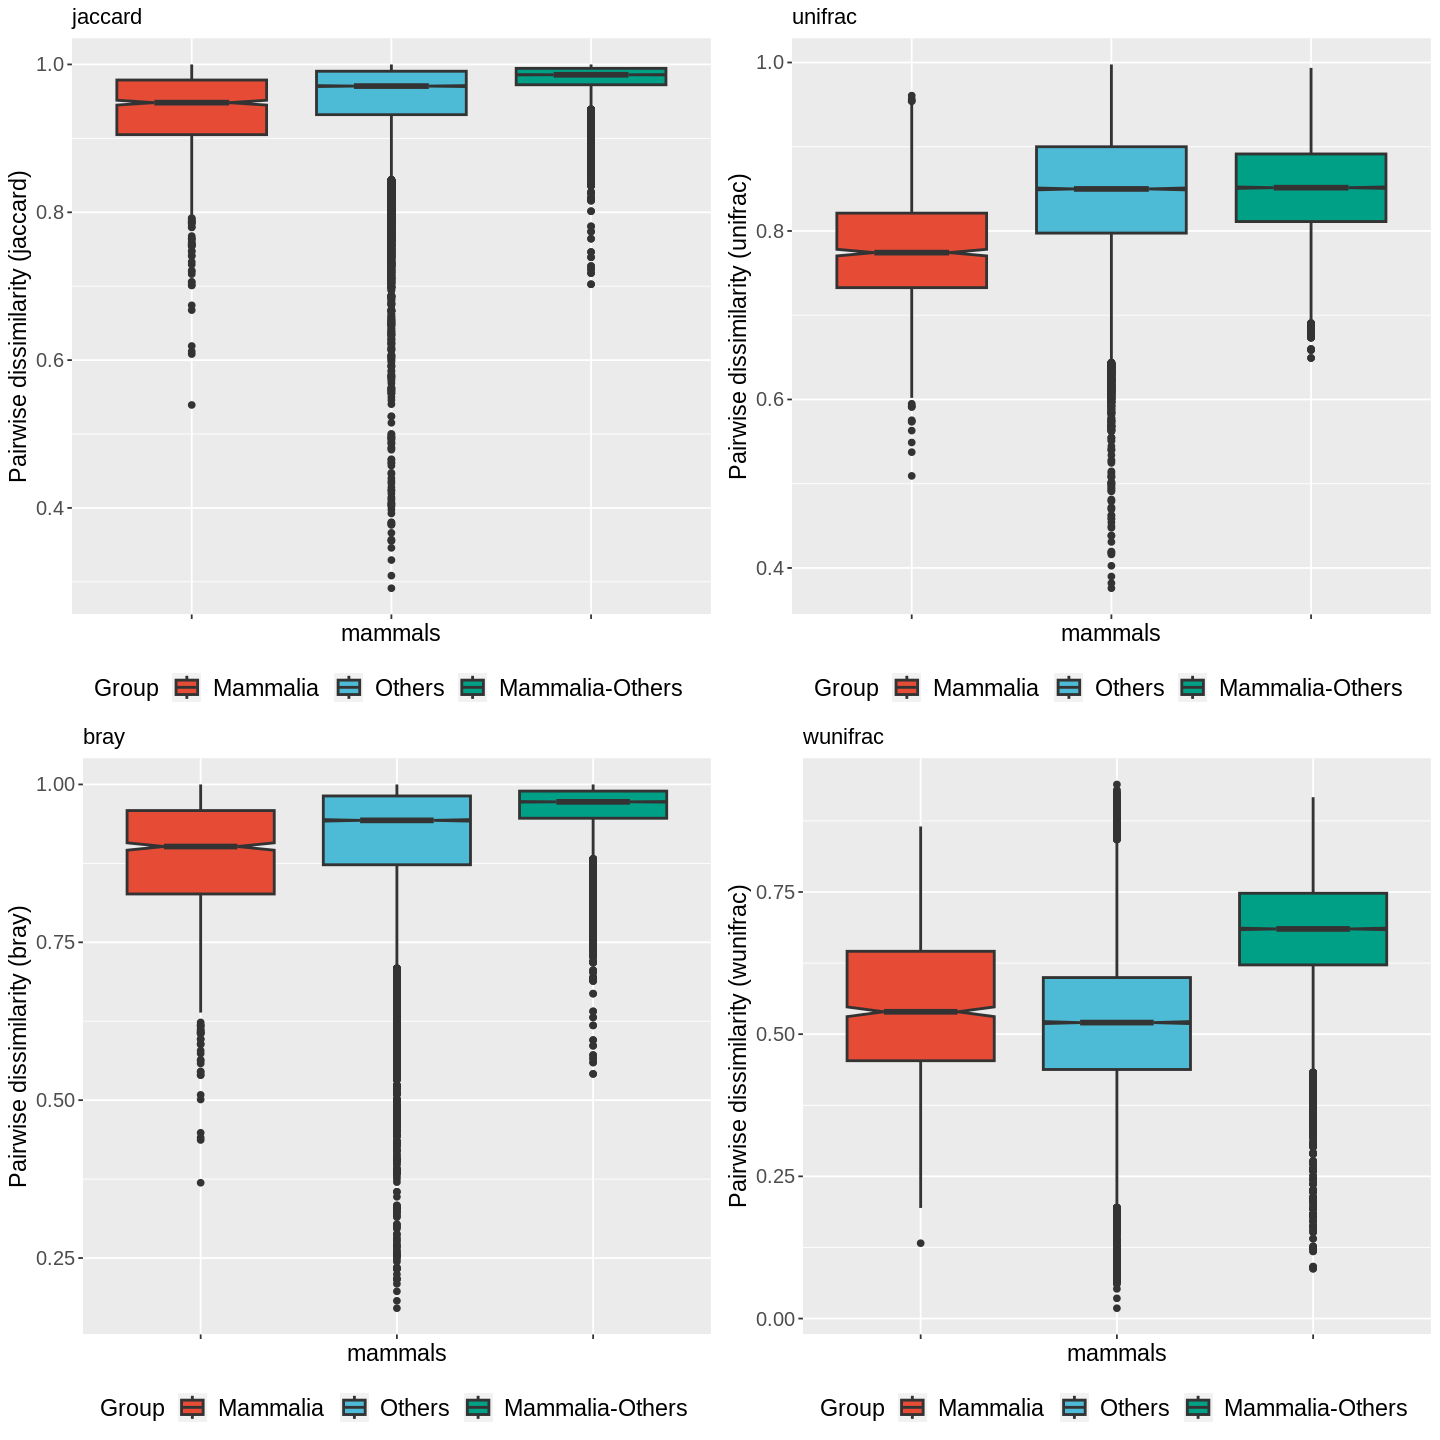

In [206]:
diss.plots.cat = compute_dissimilarity_groups_plots(subset.host,dist.method,"mammals")

In [180]:
diss.plots.cat

Warning message in print(obj):
“restarting interrupted promise evaluation”
Warning message in get(method, envir = home):
“restarting interrupted promise evaluation”
ERROR while rich displaying an object: Error in get(method, envir = home): read failed on /ebio/abt3_projects2/Flagellin_Diversity/miniconda/envs/py3_fla_2022/lib/R/library/gtable/R/gtable.rdb

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in rep

In [66]:
diss.df.cat = compute_dissimilarity_groups_df(subset.host,dist.method,"category")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



#### By biome_2

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'



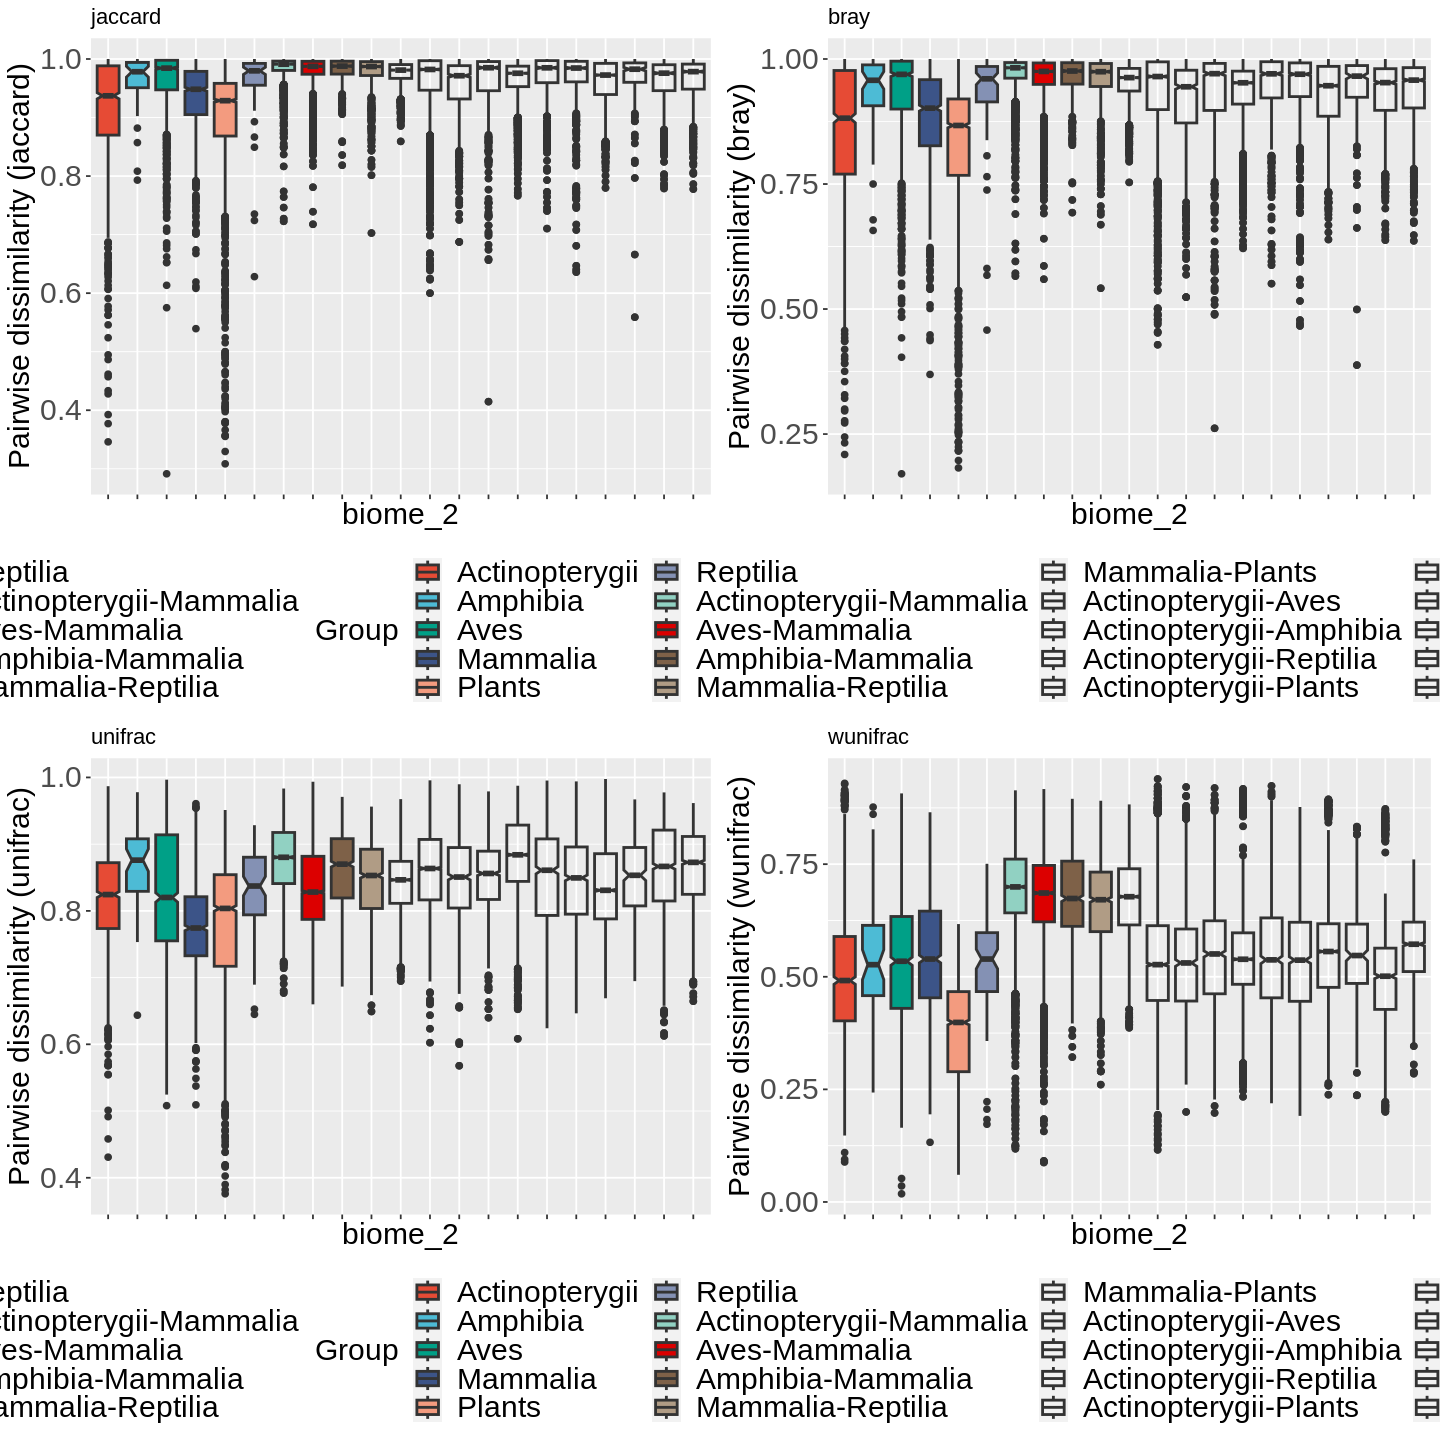

In [67]:
diss.plots.biome2 = compute_dissimilarity_groups_plots(subset.host,dist.method,"biome_2")

In [68]:
diss.df.biome2 = compute_dissimilarity_groups_df(subset.host,dist.method,"biome_2")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'



### 4. OTU trees

In [69]:
host.tre.top=plot_tree(phyloseq_filter_top_taxa(subset.host,perc=10),color="category",label.tips="family")+scale_color_npg()

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



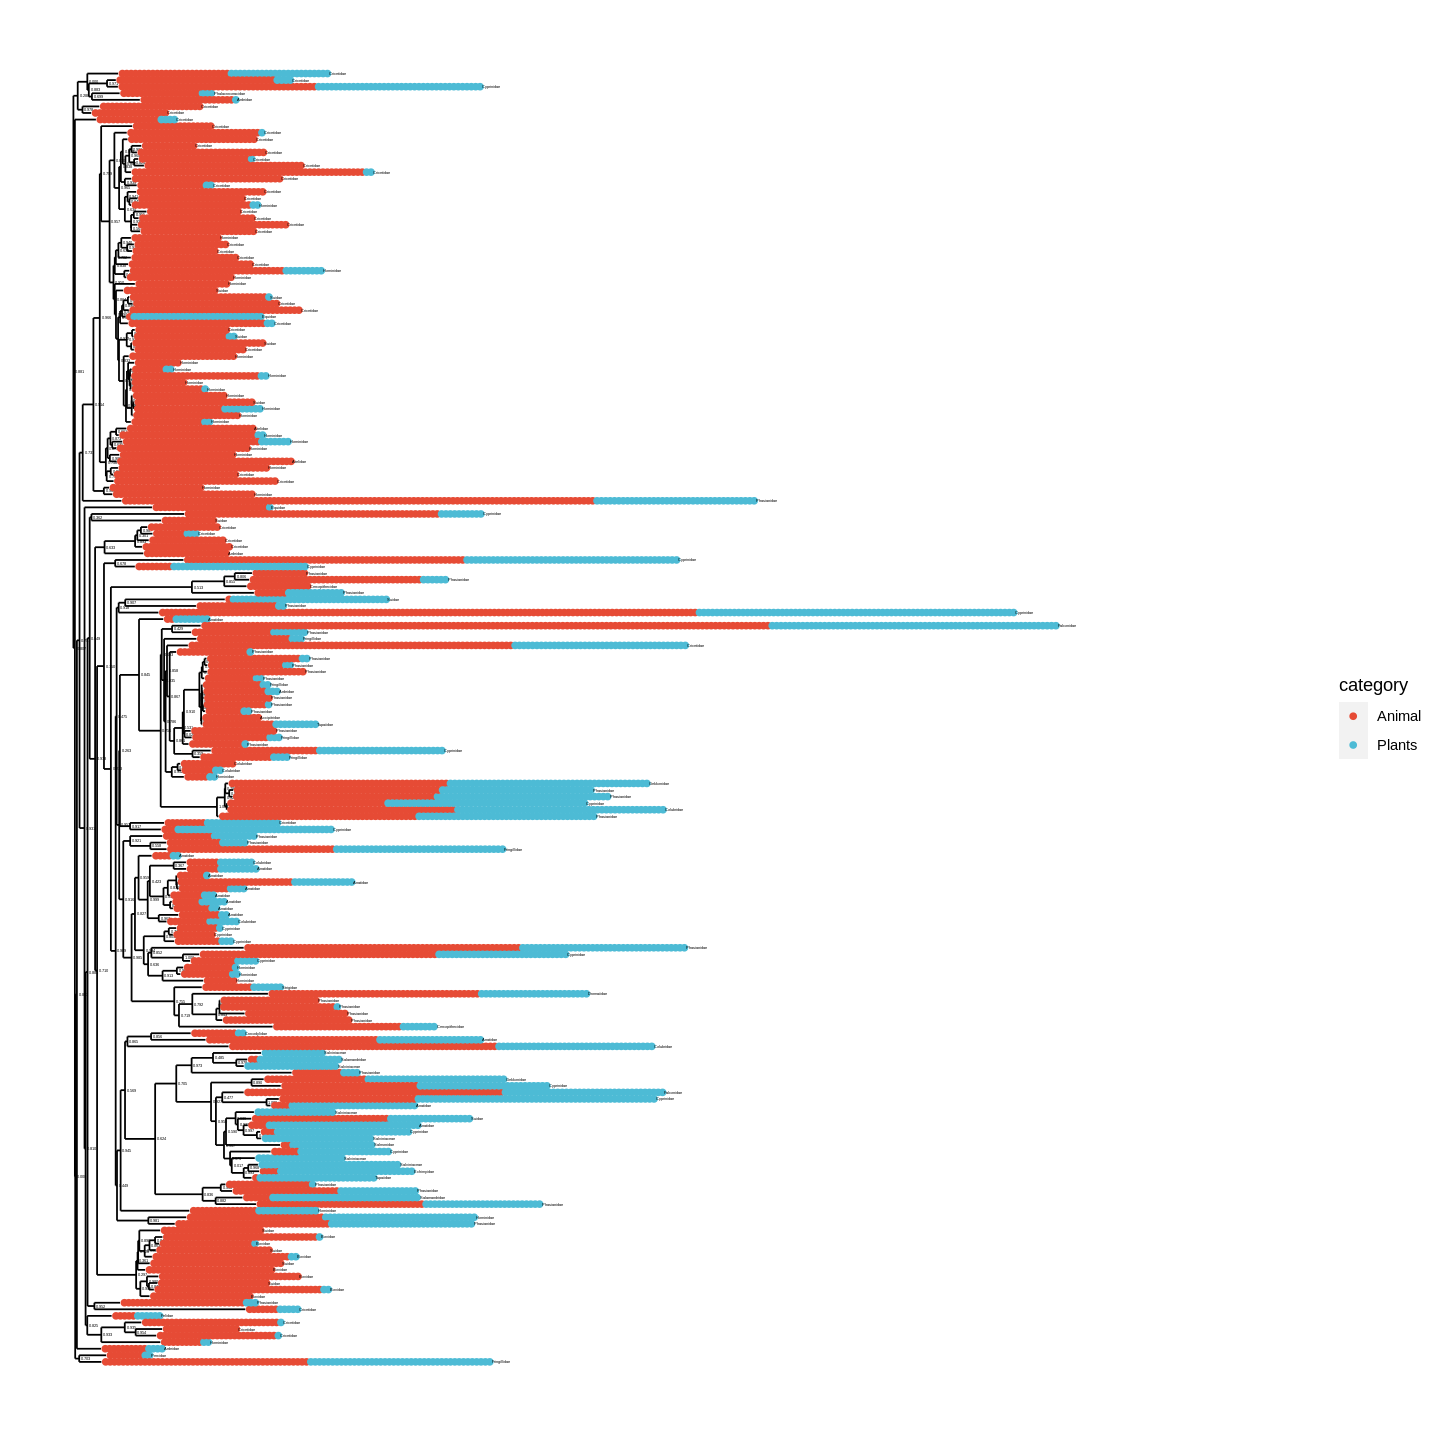

In [70]:
host.tre.top

In [71]:
tre.host.top.0.1=plot_tree(phyloseq_filter_top_taxa(subset.host,n=10),color="biome_2",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 0.1%")

tre.host.top.1=plot_tree(phyloseq_filter_top_taxa(subset.host,n=30),color="biome_2",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 1%")

tre.host.top.5=plot_tree(phyloseq_filter_top_taxa(subset.host,n=50),color="biome_2",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 5%")

tre.host.top.10=plot_tree(phyloseq_filter_top_taxa(subset.host,n=100),color="biome_2",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 10%")


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plo

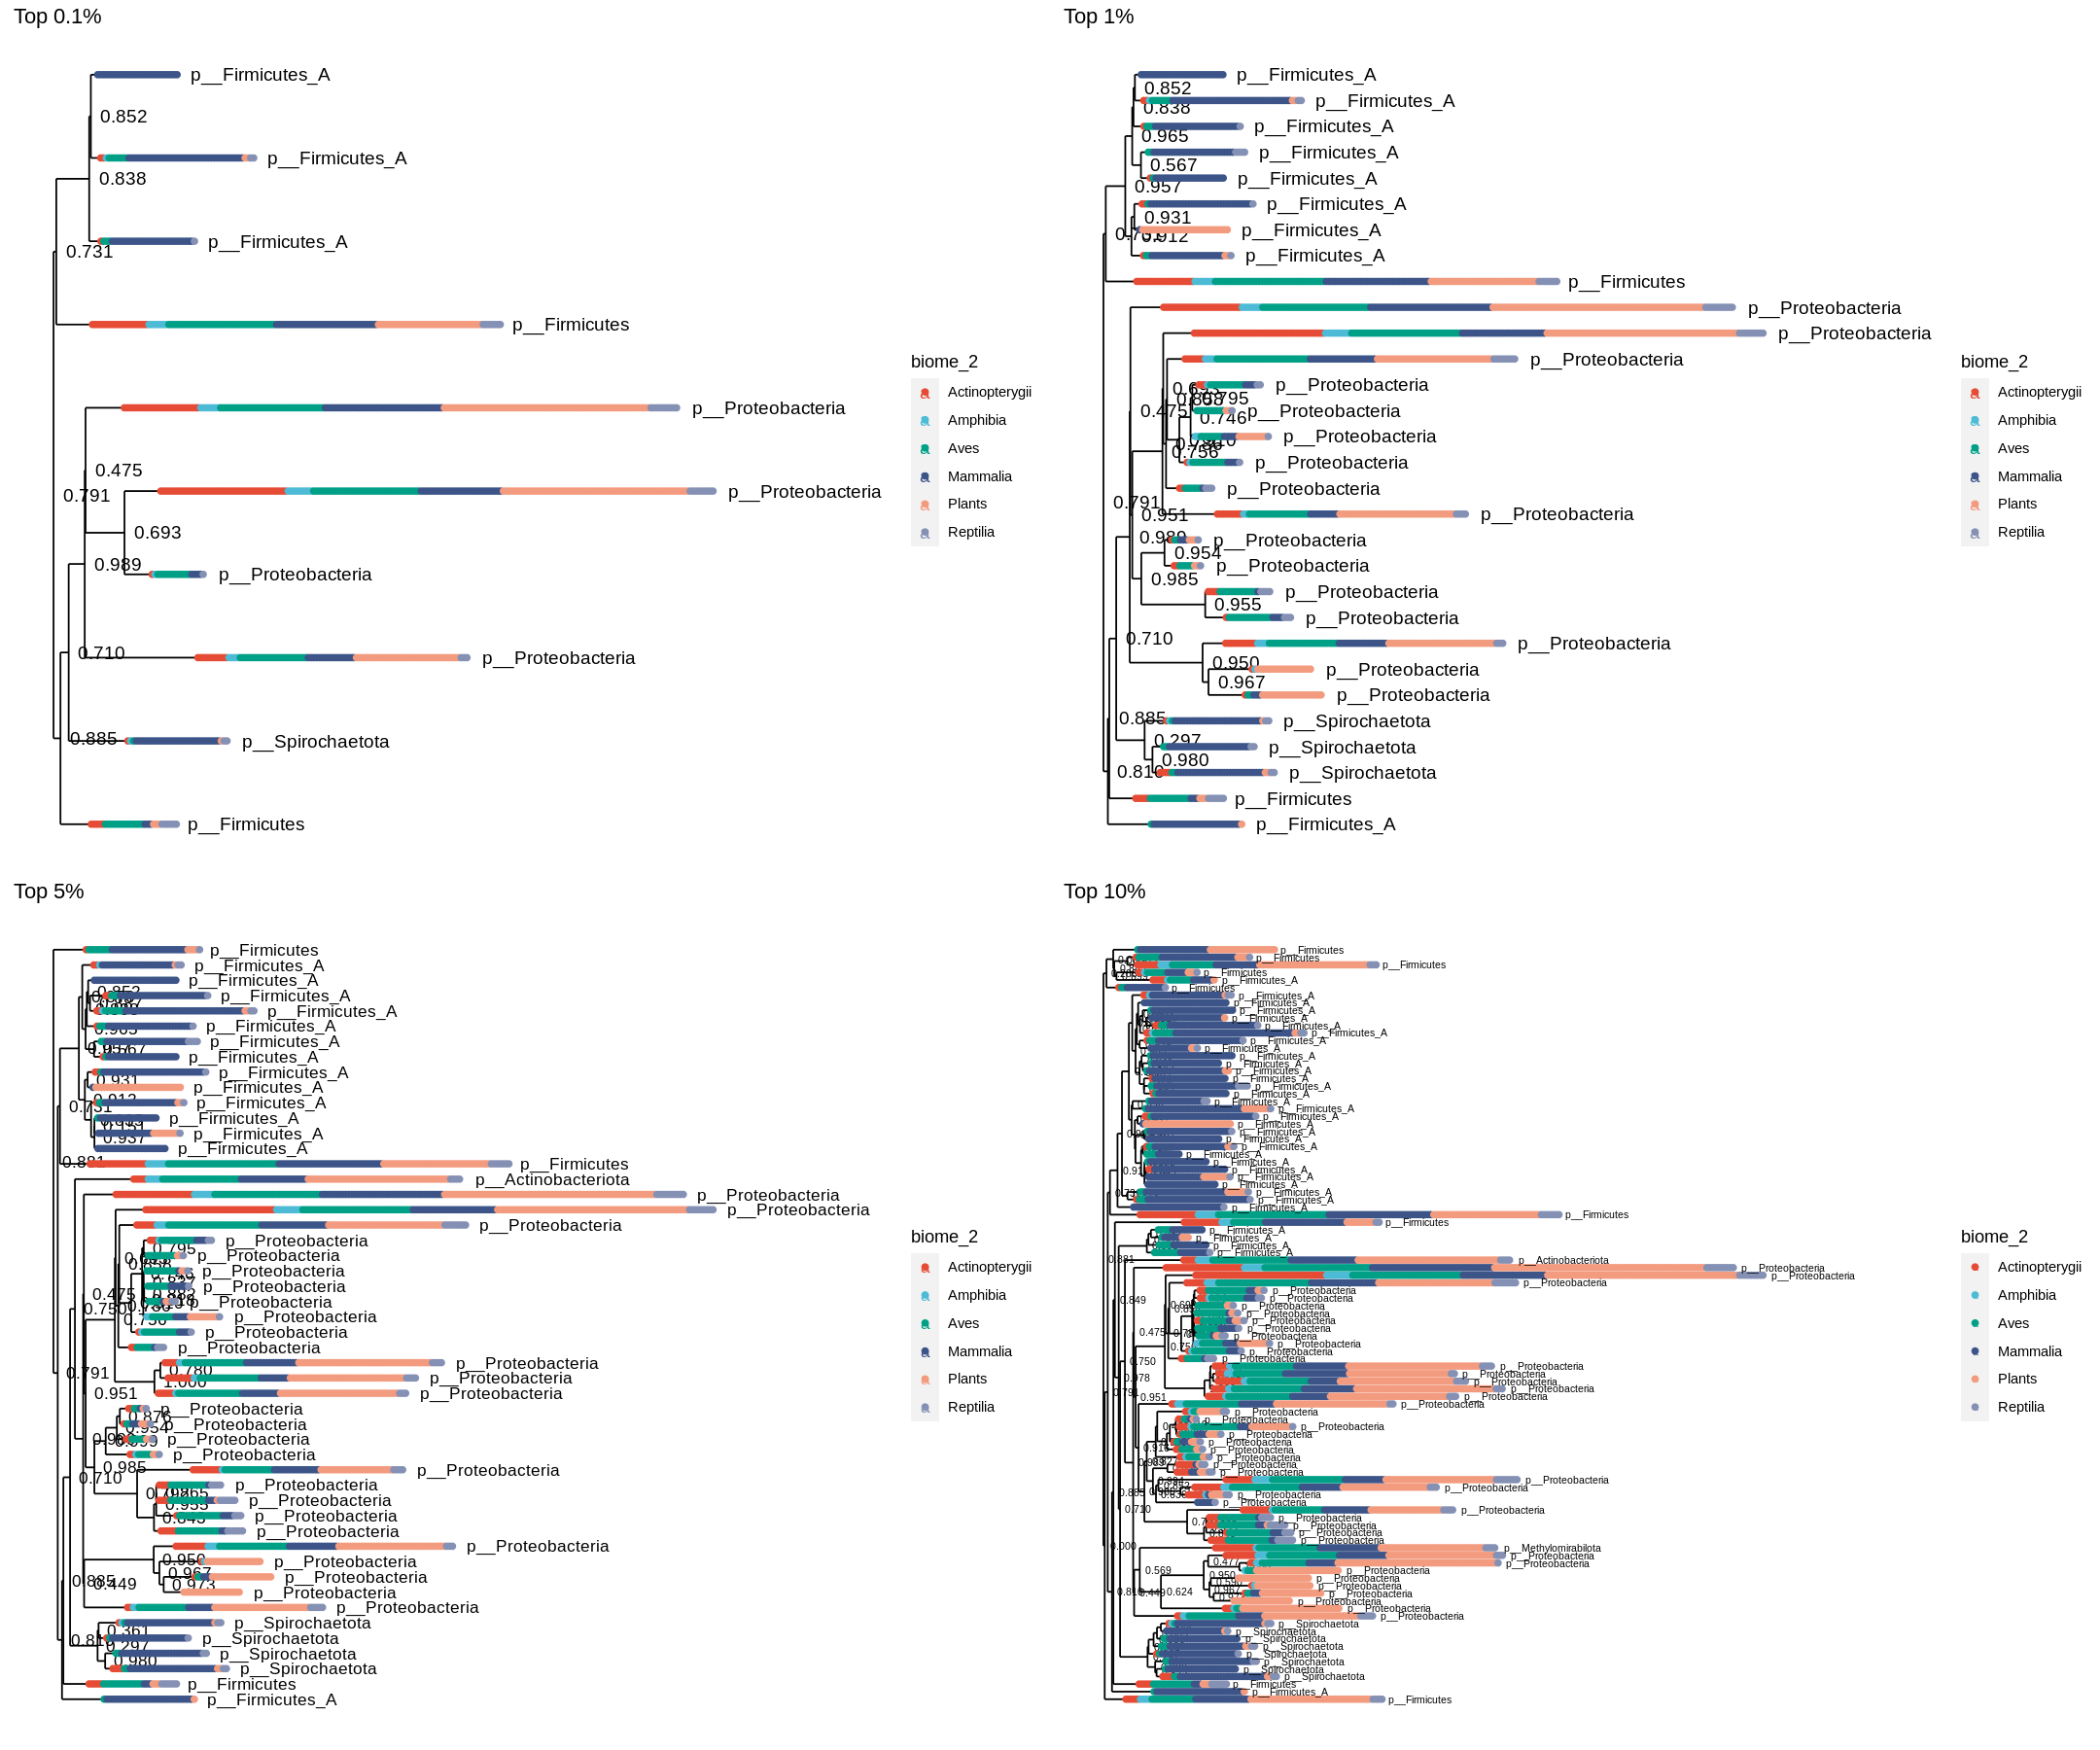

In [72]:
options(repr.plot.width=18,repr.plot.height=15)
grid.arrange(tre.host.top.0.1,
             tre.host.top.1,
             tre.host.top.5,
             tre.host.top.10,
             nrow=2)

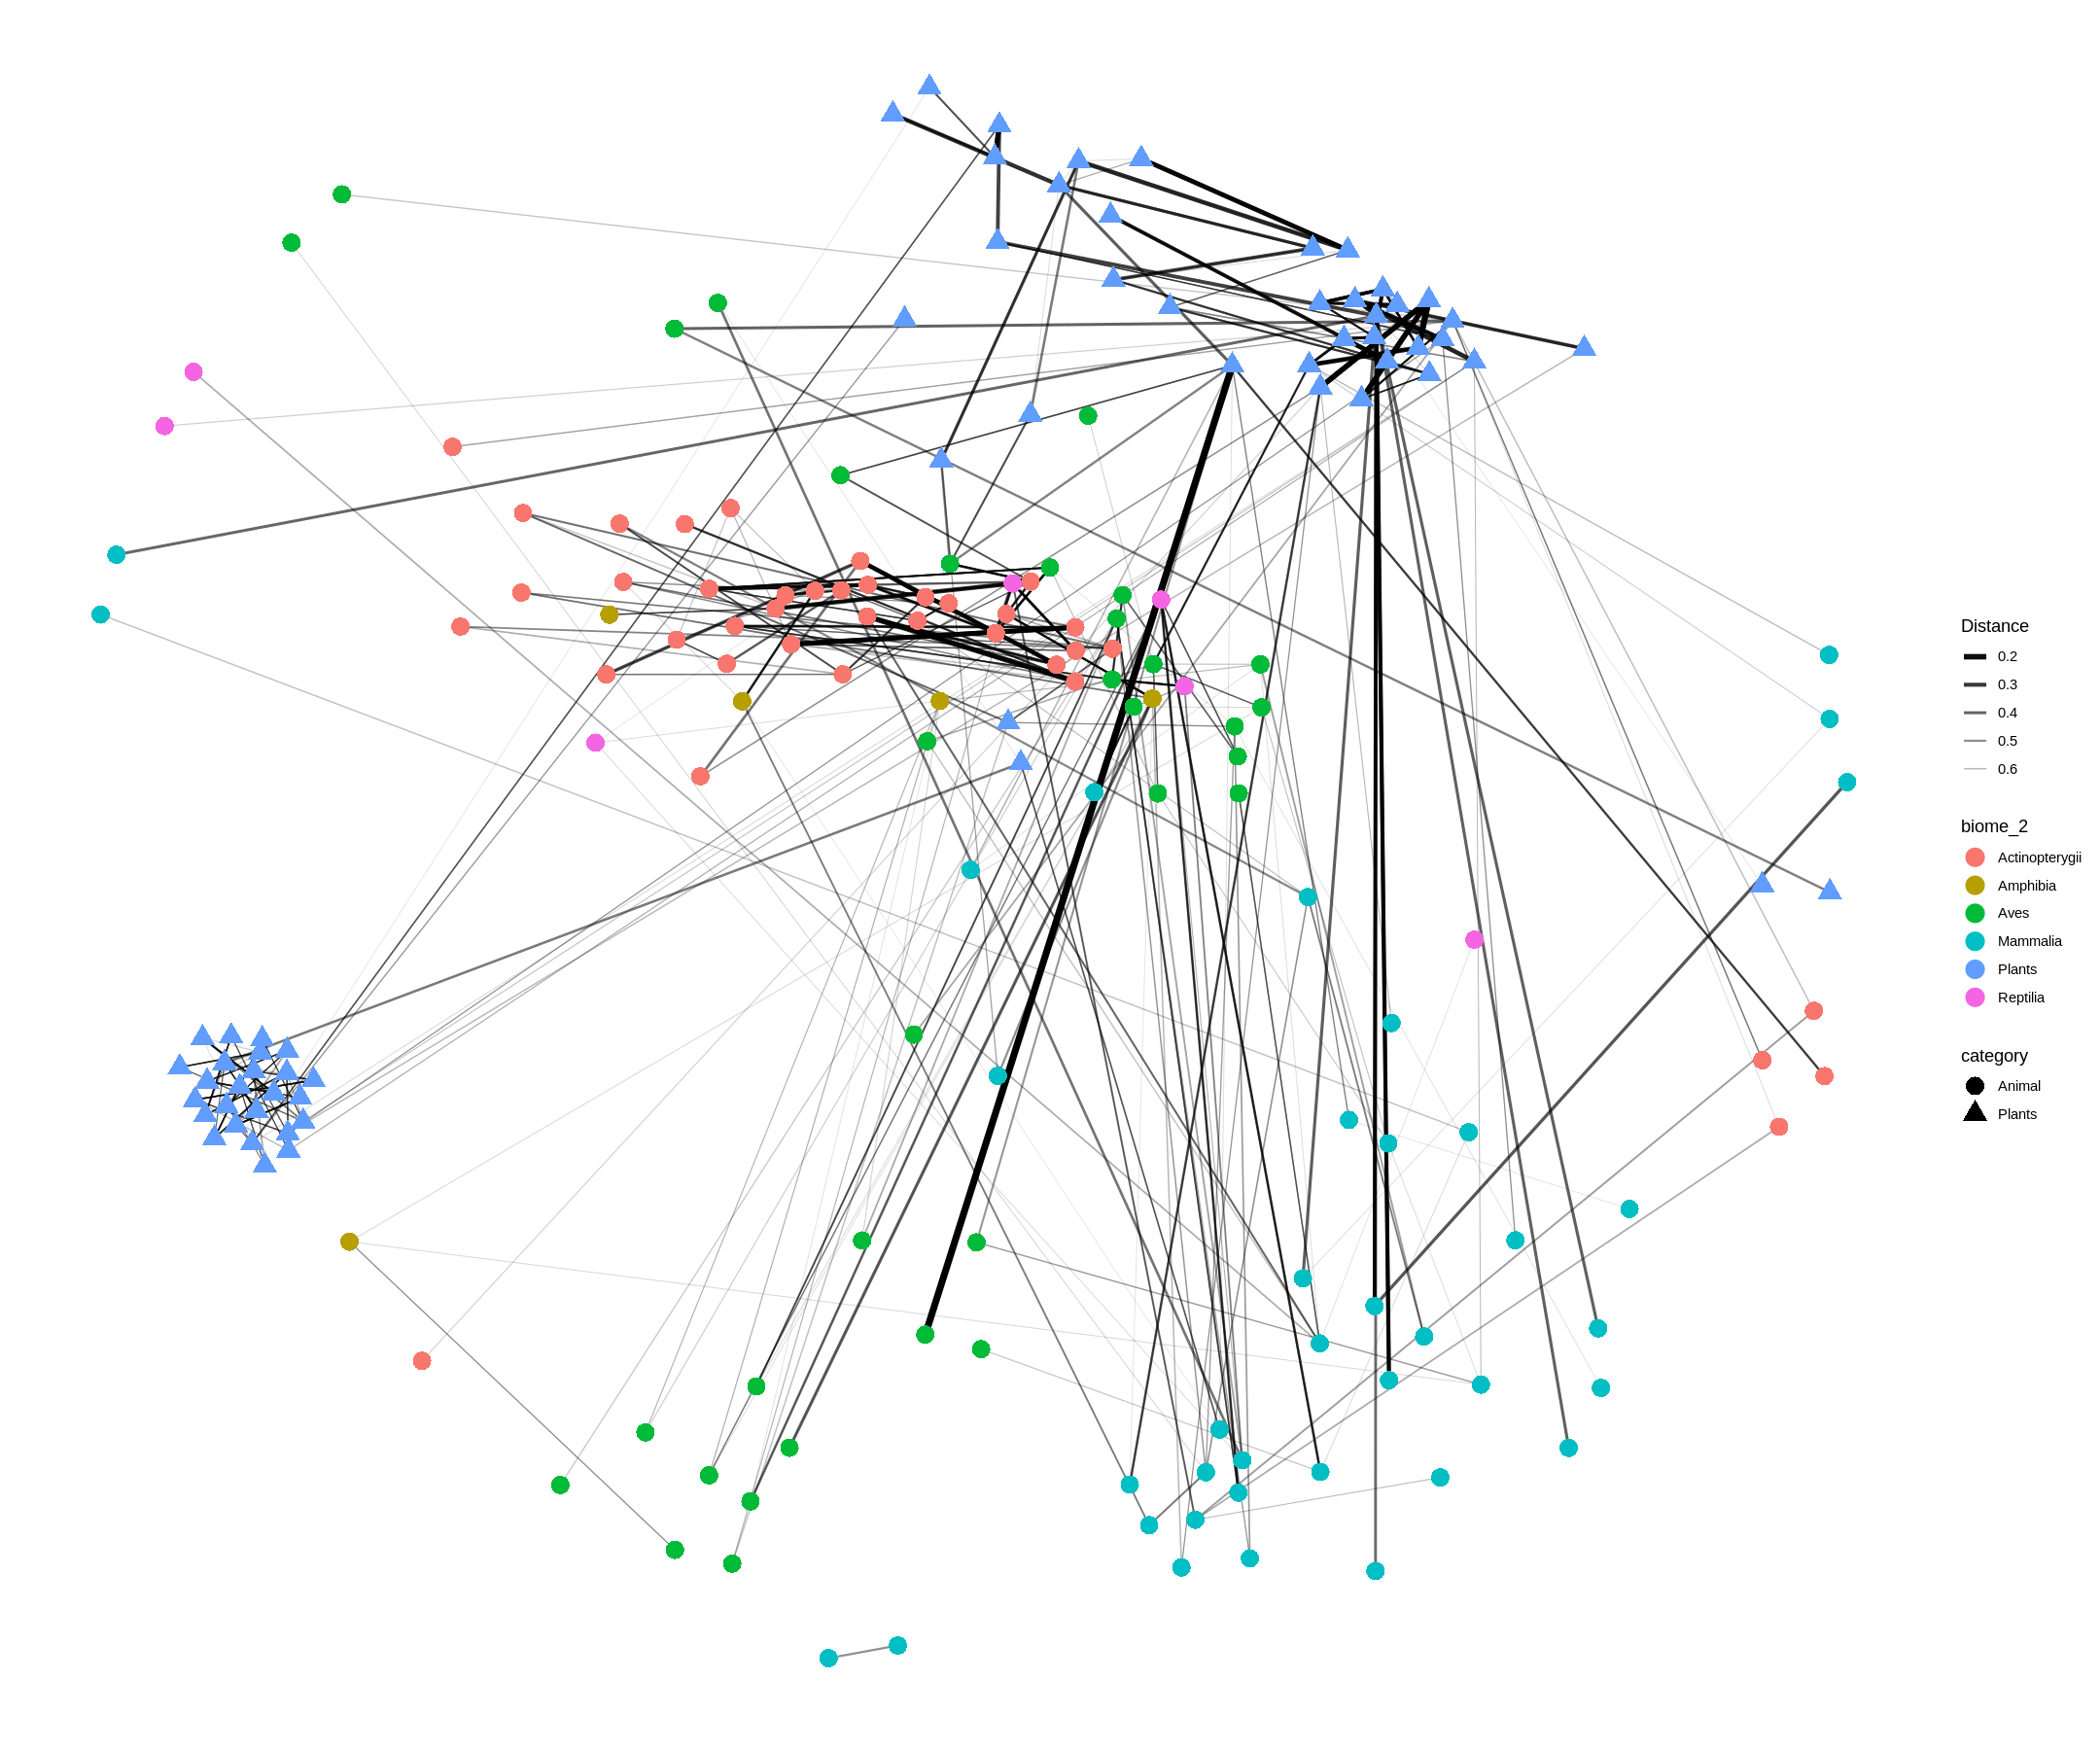

In [73]:
plot_net(subset.host, maxdist=0.7, color="biome_2", shape="category")

In [74]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects2/Flagellin_Diversity/miniconda/envs/py3_fla_2022/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] plyr_1.8.8        taxonomizr_0.10.6 cowplot_1.1.2     phyloseq_1.42.0  
 [5] knitr_1.40        ape_5.7-1         vegan_2.6-4       lattice_0.22-5   
 [9] permute_0.9-7     gridExtra_2.3     conflicted_1.2.0  viridis_0.6.4    
[13] viridisLite_0.4.2 ggsci_3.0.0       phylosignal_1.3   metagMisc_0.0.4  
[17] mi